In [1]:
import pandas as pd
#import dask.dataframe as dd
from  sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from laspy.file import File

In [1]:
import os,glob
import h5py

In [3]:
import numpy as np

In [70]:
import math

In [71]:
import seaborn as sns

In [72]:
import matplotlib.pyplot as plt

check tout les chambre

In [73]:
BASE_DIR = "D:\VR3D\VR3D_DATASET"

In [74]:
def create_list_chambre(Name,ind_zone):
    _path = BASE_DIR+'\Out_chambre\\'+Name+'\\'+Name+'_Z'+str(ind_zone+1)
    x_temp = pd.read_csv(_path+'\\List_file.txt',header=None)
    for i in range(len(x_temp)):
        os.chdir(x_temp[0][i])
        fichier = open(x_temp[0][i]+'\\List_file_filter.txt','w')
        for file in glob.glob('N*filter*.txt'):
            fichier.write(x_temp[0][i]+'\\'+file+'\n')
        fichier.close()

In [75]:
def get_max_min_chmbre(chambre_total):
    chmbr_finl = []
    for i in range(len(chambre_total)):
        cmbr = pd.read_csv(chambre_total[0][i],sep =',')
        chmbr_finl.append([cmbr['0'].min(),cmbr['0'].max(),cmbr['1'].min(),cmbr['1'].max()])#min_x,max_x,min_y,max_y
    return chmbr_finl

In [76]:
def concat_max_min_chambr(Name):
    for j in range (8): #8:nombre de Zone à travailler 
        create_list_chambre(Name,j)
        _path = BASE_DIR+'\Out_chambre\\'+Name+'\\'+Name+'_Z'+str(j+1)
        x_temp = pd.read_csv(_path+'\\List_file.txt',header=None)
        var_local = pd.DataFrame()
        for i in range(len(x_temp)):
            fichier = pd.read_csv(x_temp[0][i]+'\\List_file_filter.txt',header=None)
            cmbr_cadre = get_max_min_chmbre(fichier)
            cmbr_cadre = pd.DataFrame(cmbr_cadre)
            cmbr_cadre.to_csv(x_temp[0][i]+'\Max_Min_chambre.txt',index = False)
            var_local = var_local.append(cmbr_cadre,ignore_index=True)
        var_local.to_csv(_path+'\Max_Min_chambre.txt',index = False)

In [12]:
path = "D:\VR3D\VR3D_DATASET\Out_chambre\corbeille\List_file.txt"
file = pd.read_csv(path,header=None)
chmbr_finl = []
for i in range(len(file)):
    cmbr = pd.read_csv(file[0][i])
        
    #cmbr = pd.read_csv(data_i_j)
    chmbr_finl.append([cmbr['0'].min(),cmbr['0'].max(),cmbr['1'].min(),cmbr['1'].max()])

In [14]:
pd.DataFrame(chmbr_finl).to_csv("D:\VR3D\VR3D_DATASET\Out_chambre\Bordeau\Bordeau_Z1\MINFILTER.txt",index=False)

In [14]:
#concat_max_min_chambr('Bordeau')

IF chambre cadre avec Balayage-------------------------------------------------

------------------------------------------------------

In [77]:
def create_list_file_zone(Name):
    _path = BASE_DIR+'\Out_nuage\Out_filtre_'+Name
    os.chdir(_path)
    fichier = open(_path+'\List_file.txt','w')
    for file in glob.glob('*.las'):
        fichier.write(_path+'\\'+file+'\n')
    fichier.close
    

In [78]:
def create_fichier_list(Name,nuage_tot):
    x_temp = pd.DataFrame()
    _path = BASE_DIR+'\Out_nuage\Down_sample\Down_sample_'+Name+'_0.5'
    for i in range(len(nuage_tot)):
        fichier = [_path+'\\Nuage_sample_'+str(i+1)+'.txt']
        x_temp = x_temp.append(pd.DataFrame(fichier),ignore_index=True)
    x_temp.to_csv(_path+'\List_file.txt',index=False)
        

In [79]:
def cherche_dask(out_put_file,nuage,marge,cmbr_cadre):
    #print(out_put_file)
    #print(nuage)
    #print(cmbr_cadre)
    x_temp = pd.DataFrame()
    for i in range(2):
        shp = int(len(nuage)/2)
        ddf = pd.DataFrame(nuage[shp*i:shp*(i+1)])
        df = pd.DataFrame()
        ddf = ddf.rename(columns={0:'X',1:'Y',2:'Z',3:'I'})
        #ddf = ddf[ddf.X < 1422376.7884]
        for j in range(len(cmbr_cadre)):
            dfj = ddf[(ddf.X >= (cmbr_cadre['0'][j]-marge))&(ddf.X <= (cmbr_cadre['1'][j]+marge))&
                      (ddf.Y >= (cmbr_cadre['2'][j]-marge))&(ddf.Y <= (cmbr_cadre['3'][j]+marge))]
            
            df = df.append(dfj,ignore_index=True)
        df = df.drop_duplicates()
        x_temp = x_temp.append(df,ignore_index=True)
    x_temp.to_csv(out_put_file,index = False)

In [80]:
def concat_max_min_chmbr(Name,ind_zone):
    path_= BASE_DIR+'\J35_txt_cutted\VR3D_'+Name+'\DXF_file\z'+str(ind_zone)
    List_file = pd.read_csv(path_+'\\List_file.txt',header=None)
    x_temp = pd.DataFrame()
    for i in range(len(List_file)):
        os.chdir(List_file[0][i])
        for file in glob.glob('M*.txt'):
            _path = List_file[0][i]+'\\'+file
            x_temp = x_temp.append(pd.read_csv(_path),ignore_index=True)
    x_temp.to_csv(path_+'\\'+file,index=False)

In [81]:
def split(Name,nuage_tot,filtre,marge):
    Liste_file = pd.read_csv('D:\VR3D\VR3D_DATASET\Out_nuage\Filtre_intensite\List_file.txt',header=None)
    for i in range(len(nuage_tot)):
        if filtre:
            #path_output = BASE_DIR+'\Out_nuage\Down_sample_filtre\Down_sample_'+Name+'_0.5'
            path_output = "D:\VR3D\VR3D_DATASET\Out_nuage\Filtre_intensite"
            #path_dxf = BASE_DIR+'\Out_chambre\\'+Name+'\\'+Name+'_z'+str(i+1)
            path_dxf = BASE_DIR+'\Out_chambre\\'+Name+'\\'+Name+'_z'+str(1)
        else :   
            path_output = BASE_DIR+'\Out_nuage\Down_sample\Down_sample_'+Name+'_0.5'
            path_dxf = BASE_DIR+'\J35_txt_cutted\VR3D_'+Name+'\DXF_file\z'+str(1)
            # path_dxf = BASE_DIR+'\J35_txt_cutted\VR3D_'+Name+'\DXF_file\z'+str(i+1)
            concat_max_min_chmbr(Name,i+1)
        if nuage_tot.to_numpy()[i][0][-3:]=='las':
            #save_path = _path+str(i)+'.txt'
            #os.system('D:\VR3D\Tools\LAStools\\bin\\txt2las.exe -i \"' + save_path + '\"  -parse xyzi -olas')
            lasfile = File(nuage_tot[0][i],mode = 'r')
            print(len(lasfile))
            loc_var = np.empty((len(lasfile),4))
            loc_var[:, 0] = lasfile.x[:]
            loc_var[:, 1] = lasfile.y[:]
            loc_var[:, 2] = lasfile.z[:]
            loc_var[:, 3] = lasfile.intensity[:]
            lasfile.close()
            print(f'-----------{i+1}') 
            #nuage= pd.DataFrame(loc_var)
            
            if filtre : 
                cmbr_cadre = pd.read_csv(path_dxf+'\MAX_Min_chmbr.txt')
            else :
                print('on ait la')
                cmbr_cadre = pd.read_csv(path_dxf+'\Max_Min_chambre.txt')
                a = cmbr_cadre['1'].copy()
                cmbr_cadre['1'] = cmbr_cadre['2']
                cmbr_cadre['2'] = a
            out = path_output+'\\Nuage_sample_'+str(i+1)+'.txt'
            cherche_dask(out, loc_var, marge, cmbr_cadre)
        else :
            if filtre : 
                #"D:\VR3D\VR3D_DATASET\Out_final\Bordeau\Bordeau_Z1\MAXMINFILTER.txt"
                cmbr_cadre = pd.read_csv(path_dxf+'\MINFILTER.txt')
            else :
                cmbr_cadre = pd.read_csv(path_dxf+'\MINFILTER.txt')
                a = cmbr_cadre['1'].copy()
                cmbr_cadre['1'] = cmbr_cadre['2']
                cmbr_cadre['2'] = a
                out = path_output+'\\Nuage_sample_'+str(i)+'.txt'
            cherche_dask(pd.read_csv(nuage_tot[0][i],header=None,sep=' '),marge,cmbr_cadre,Liste_file)
            print('------down_'+str(i)+'----------')


In [83]:
def run(Name,filtre,marge):
    create_list_file_zone(Name)
    if filtre:
        #nuage_tot = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_train\corbeille\OUT.txt",header=None)
        nuage_tot = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_nuage\Out_filtre_Bordeau\List_file.txt",header=None)
        #nuage_tot = pd.read_csv(BASE_DIR+'\Out_nuage\Down_sample\Down_sample_'+Name+'_0.5\List_file.txt',header = None)
    else:
        nuage_tot = pd.read_csv(BASE_DIR+'\Out_nuage\Out_filtre_'+Name+'\List_file.txt',header = None)
    # create_fichier_list(Name,nuage_tot)
    split(Name,nuage_tot,filtre,marge)

In [66]:
run('XX', True, 0.5)

41892667
-----------1
on ait la


In [73]:
def create_file_chmbr(cmbr_cadre):
    _path = "D:\VR3D\VR3D_DATASET\Out_nuage\Filtre_intensite"
    fichier = open(_path+'\List_file.txt','a')
    for i in range(len(cmbr_cadre)):
        fichier.write(_path+'\\chambre'+str(i)+'.txt\n')
    fichier.close()

In [74]:
path_dxf = "D:\VR3D\VR3D_DATASET\Out_chambre\Bordeau\Bordeau_Z1"
cmbr_cadre = pd.read_csv(path_dxf+'\MINFILTER.txt')

In [75]:
create_file_chmbr(cmbr_cadre)

In [ ]:
"D:\VR3D\VR3D_DATASET\Out_train\corbeille\out2.txt"

In [ ]:
"D:\VR3D\VR3D_DATASET\Out_train\corbeille\out2.txt""D:\VR3D\VR3D_DATASET\Out_train\corbeille\out2.txt"

In [9]:
path = "D:\VR3D\VR3D_DATASET\Out_train\Out_train_Paris_0.5\\"

In [11]:
tot = pd.DataFrame()
list_out = pd.read_csv(path+'OUT.txt',header=None)
for i in range(len(list_out)):
    tot = tot.append(pd.read_csv(list_out[0][i]),ignore_index=True)
tot.to_csv(path+'OUT_total.txt',index=False)

In [12]:
train_to_test = pd.read_csv(path+'out1.txt')
train_to_test = train_to_test.drop('L',axis=1)

In [13]:
train_to_test

,X,Y,Z,I
0,1656061.35,8181826.33,38.35,28216.0
1,1656061.31,8181826.32,38.35,25449.0
2,1656061.33,8181826.25,38.36,26978.0
3,1656061.36,8181826.16,38.35,28216.0
4,1656061.27,8181826.29,38.35,25777.0
...,...,...,...,...
44438,1655949.74,8181725.80,40.89,37609.0
44439,1655949.72,8181725.86,40.88,30437.0
44440,1655949.70,8181725.90,40.89,35716.0
44441,1655949.78,8181725.83,40.88,8228.0


In [14]:
train_to_test.to_csv(path+'out1_test.txt',index=False)

In [17]:
path = "D:\\MAS\\Pre_traitement\\data_source\\p1_zone1.txt"

In [4]:
import pandas as pd
import os 

In [19]:
test_data = pd.read_csv(path,header = None,sep = ' ')

In [20]:
test_data = test_data.drop(4,axis=1)

In [24]:
test_data.to_csv('D:\\MAS\\Pre_traitement\\data_source\\p1_zone1_test.txt',index=False)

In [6]:
path_test = "D:\VR3D\VR3D_DATASET\Out_nuage\Filtre_intensite\chambre_filtre159.txt"

In [7]:
os.system('D:\VR3D\Tools\LAStools\\bin\\txt2las.exe -i \"' + path_test+ '\" -parse xyzi -olas')

0

In [32]:
path_las = "D:\\MAS\\Pre_traitement\\data_source\\p1_zone1_test.las"

In [5]:
from laspy.file import File

In [41]:
lasfile = File(path_las,mode = 'rw')

In [48]:
lasfile

array([21967, 31063, 28048, ..., 19581, 15204, 15964], dtype=uint16)

Pour la visualisation de donne d'entrainement


PostProcess Test

Concatenations de tout les chambres

In [10]:
fil_list = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_train\Down_sample_paris_0.5\OUT.txt",header=None)

In [11]:
fil_list[0][0]

'D:\\VR3D\\VR3D_DATASET\\Out_train\\Down_sample_paris_0.5\\Out0.txt'

In [12]:
chmbr_tot = pd.DataFrame()
for i in range(len(fil_list)):
    chmbr_tot = chmbr_tot.append(pd.read_csv(fil_list[0][i],sep= ','),ignore_index=True)

In [13]:
chmbr_tot

,X,Y,Z,I,L
0,1656042.48,8181257.93,51.43,27643.0,0.0
1,1656042.58,8181258.01,51.36,29460.0,0.0
2,1656042.64,8181258.01,51.45,32290.0,0.0
3,1656042.76,8181258.00,51.61,31218.0,0.0
4,1656042.85,8181258.08,51.54,29490.0,0.0
...,...,...,...,...,...
4535537,1656325.22,8180949.41,51.17,24218.0,1.0
4535538,1656325.19,8180949.38,51.21,26690.0,1.0
4535539,1656325.26,8180950.72,50.83,31397.0,1.0
4535540,1656325.22,8180949.41,51.30,31605.0,1.0


In [17]:
#sns.displot(chmbr_tot,hue='L')

In [19]:
chmbr_tot.I = ((chmbr_tot.I -pd_mas[3].mean())/clc_var(pd_mas))**2

In [22]:
chmbr_tot.I = np.sqrt((chmbr_tot.I))

In [37]:
chmbr_tot.to_csv('D:\\VR3D\\VR3D_DATASET\\Out_train\\Down_sample_corr_0.5\\Data_train.txt',index=False)

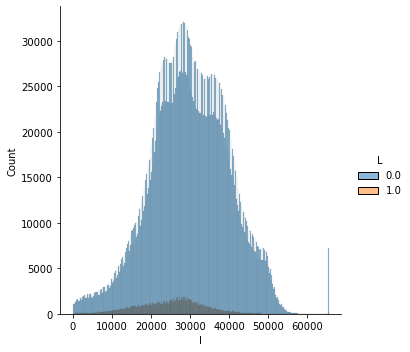

In [14]:
sns.displot(chmbr_tot,x='I',hue='L')

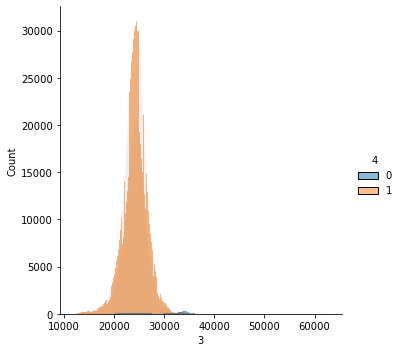

In [17]:
sns.displot(rgb,x = 3,hue = 4)

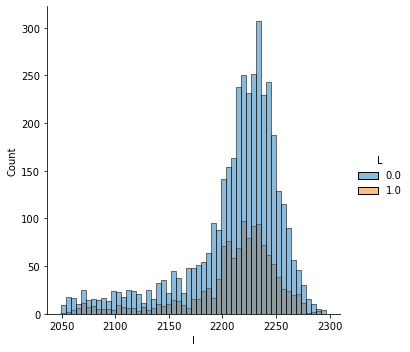

In [20]:
sns.displot(intenst_vr3d,x = 'I',hue = 'L')

In [130]:
rgb = pd.concat([rgb_0,rgb_1],ignore_index=True)

In [131]:
rgb

,0,1,2,3,4
0,1642732.41,8198848.22,75.94,30,0
1,1642732.44,8198848.26,75.95,30,0
2,1642732.48,8198848.21,75.94,30,0
3,1642732.51,8198848.25,75.95,30,0
4,1642732.43,8198848.20,75.94,30,0
...,...,...,...,...,...
3870709,1642743.94,8198846.09,75.53,3000,1
3870710,1642743.98,8198845.99,75.59,3000,1
3870711,1642743.98,8198845.99,75.68,3000,1
3870712,1642743.92,8198846.12,75.62,3000,1


In [132]:
rgb.to_csv('D:\VR3D\labelisation automatique\Pre_traitement\data_source\p1_zone1_rgb.txt',index=False)

In [149]:
out_file = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_train\Down_sample_0.3\Out0.txt",sep = ',')

In [150]:
out_file

,X,Y,Z,I,L
0,1422353.645,4189793.836,61.146,2116.0,0.0
1,1422353.683,4189793.933,61.307,2195.0,0.0
2,1422353.590,4189793.705,61.104,2213.0,0.0
3,1422353.145,4189793.926,60.914,2119.0,0.0
4,1422353.387,4189793.903,61.221,2235.0,0.0
...,...,...,...,...,...
5152,1422327.892,4189794.577,60.531,2237.0,1.0
5153,1422327.652,4189794.578,60.527,2254.0,1.0
5154,1422327.586,4189794.442,60.536,2233.0,1.0
5155,1422327.868,4189794.174,60.547,2250.0,1.0


In [ ]:
concat_file = pd.DataFrame()
for i in range(len(out_file)):
    concat_file = concat_file.append(pd.read_csv(out_file[0][i]),ignore_index=True)

In [94]:
test = pd.read_csv(out_file[0][0])

In [151]:
test = out_file.copy()

<AxesSubplot:>

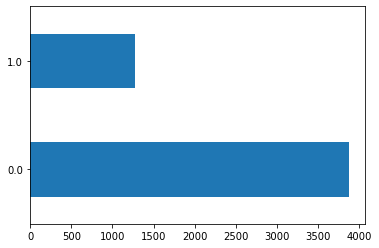

In [153]:
test['L'].value_counts().plot(kind = 'barh')

In [154]:
test['I'].min()

2049.0

In [155]:
test['I'].max()

2297.0

In [156]:
test['I'].mean()

2210.754508435137

In [ ]:
import h5py

In [2]:
save_path = "D:\VR3D\VR3D_DATASET\Out_nuage\Filtre_intensite\chambre_filtre152.txt"

In [3]:
os.system('D:\VR3D\Tools\LAStools\\bin\\txt2las.exe -i \"' + save_path + '\" -parse xyzi -olas')


0

Faire de KMeans

In [59]:
Fil_list = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_train\Down_sample_paris_0.5\OUT_paris.txt",header=None)

In [26]:
Fil_list = pd.read_csv("D:\VR3D\VR3D_DATASET\Out_train\Down_sample_corr_0.5\Fil_list.txt",header=None)

In [60]:
out_data = pd.DataFrame()
for i in range(len(Fil_list)):
    out_data = out_data.append(pd.read_csv(Fil_list[0][i]),ignore_index=True)

In [8]:
data_train = out_data.copy()

<AxesSubplot:>

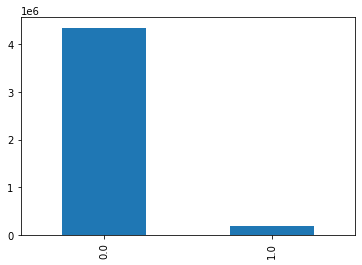

In [9]:
data_train['L'].value_counts().plot(kind = 'bar')

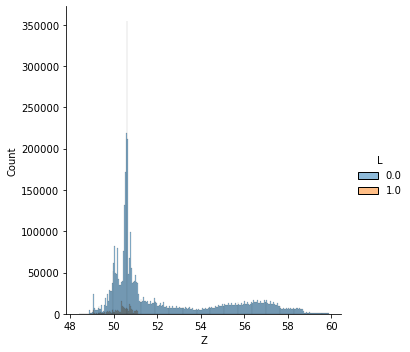

In [11]:
sns.displot(data_train,x=data_train['Z'],hue=data_train['L'])

In [106]:
model = "D:\\Trained_ep19MAs_2022-02-01-11 36 07_Down_sample_bordeau_elevation_filtre.h5"

In [ ]:
model.

In [10]:
import pandas as pd

In [11]:
path  = "D:\MAS\Pre_traitement\data_source\modife_data_contour_1_obj_alls.txt"

In [12]:
test = pd.read_csv(path,header=None,sep=' ')

In [13]:
test_1 = test[test[4]==1]

In [14]:
test_0 = test[test[4]==0]

In [15]:
test_0[2] += 1

C:\Users\A2921~1.RAK\AppData\Local\Temp/ipykernel_2832/2994978119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_0[2] += 1


In [16]:
test = pd.concat([test_0,test_1],axis=0,ignore_index=True)

In [17]:
test

,0,1,2,3,4
0,1495285.62,7196996.33,54.90,999.037,0
1,1495285.71,7196996.26,54.91,999.037,0
2,1495285.73,7196996.26,54.91,999.037,0
3,1495285.74,7196996.29,54.91,999.037,0
4,1495285.65,7196996.30,54.91,999.037,0
...,...,...,...,...,...
110587,1495284.10,7196997.72,53.77,993.784,1
110588,1495284.92,7196997.18,54.03,993.784,1
110589,1495283.93,7196998.07,53.74,993.784,1
110590,1495285.12,7196996.96,53.92,993.784,1


In [18]:
test.to_csv("D:\\MAS\\Pre_traitement\\data_source\\data_contour_1_obj_alls_test.txt",index=False)